In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
# preprocessing images for neural network (scale to [0,1])
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4913 - accuracy: 0.8280
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3738 - accuracy: 0.8654
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3354 - accuracy: 0.8778
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8859
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2931 - accuracy: 0.8926
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.8956
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.8996
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9050


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 651us/step - loss: 0.3301 - accuracy: 0.8828
Test accuracy:  0.8827999830245972


Pick a number: 632


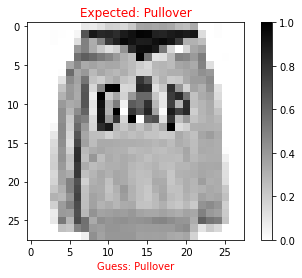

In [29]:
COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: "+label)
    plt.xlabel("Guess: "+guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return num
            else:
                print("Try again...")
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model,image,label)